# Atwell - Assignment 2 Code

##Package import, initial setup, and data import

In [616]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
from operator import itemgetter
import os
os.getcwd()

'C:\\Users\\mlatw\\Desktop\\BIA6303\\Final_Project'

####Change working directory if needed

In [617]:
#cd C:\\Users\\mlatw\\Desktop\\BIA6303\\Assignment_2

### Read in Data
The data is contained in two different files (train and test).

In [618]:
#import train data
pd.options.display.max_rows = 10
df_drug = pd.read_csv("drug_consumption_data.csv", header=None,  
                      names = ['ID','Age','Gender','Education','Country','Ethnicity','N_Score','E_Score','O_Score',
                               'A_Score','C_Score','Impulsivenesss','SS','Alcohol','Amphetamine','Amyl',
                              'Benzos','Caffeine','Cannibis','Chocolate','Cocaine','Crack','Esctacy','Heroin',
                              'Ketamine','Legal_highs','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'])
del df_drug['ID'] #drops unnecessary ID column
df_drug

,Age,Gender,Education,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,...,Esctacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


##Data Munging

First let's look at the data types to see what we're working with.

In [619]:
pd.options.display.max_rows = 31
print("Training Data Type", df_drug.dtypes)

Training Data Type Age               float64
Gender            float64
Education         float64
Country           float64
Ethnicity         float64
N_Score           float64
E_Score           float64
O_Score           float64
A_Score           float64
C_Score           float64
Impulsivenesss    float64
SS                float64
Alcohol            object
Amphetamine        object
Amyl               object
Benzos             object
Caffeine           object
Cannibis           object
Chocolate          object
Cocaine            object
Crack              object
Esctacy            object
Heroin             object
Ketamine           object
Legal_highs        object
LSD                object
Meth               object
Mushrooms          object
Nicotine           object
Semer              object
VSA                object
dtype: object


We see that the first 12 columns are all numeric, and the remainder are objects.

In [620]:
df_drug.isnull().sum()

Age               0
Gender            0
Education         0
Country           0
Ethnicity         0
N_Score           0
E_Score           0
O_Score           0
A_Score           0
C_Score           0
Impulsivenesss    0
SS                0
Alcohol           0
Amphetamine       0
Amyl              0
Benzos            0
Caffeine          0
Cannibis          0
Chocolate         0
Cocaine           0
Crack             0
Esctacy           0
Heroin            0
Ketamine          0
Legal_highs       0
LSD               0
Meth              0
Mushrooms         0
Nicotine          0
Semer             0
VSA               0
dtype: int64

No nulls!  The second to last column, 'Semer', is a fictional drug designed to tease out over-claimers. Let's see how many respondants said they used it.  

In [621]:
df_drug.Semer.value_counts()

CL0    1877
CL2       3
CL1       2
CL3       2
CL4       1
Name: Semer, dtype: int64

Since a very small number of respondents (8) said they used Semer, we can safely drop these rows from the dataset, and then drop the column.

In [622]:
df_drug = df_drug[df_drug['Semer'] == 'CL0']


del df_drug['Semer']
df_drug = df_drug.reset_index(drop=True)
print(df_drug.shape) #confirm correct operation
#iris.ix[iris['sepal length (cm)'] >= 5]
df_drug

(1877, 30)


,Age,Gender,Education,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,...,Crack,Esctacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


Now let's look at the non-numeric columns to see what's in them.

In [623]:
#print(df_drug.value_counts())
df_drug_object_only = df_drug.iloc[:,12:]
print(df_drug_object_only.shape)
#df_drug_object_only.apply(pd.Series.value_counts)
#print("Test Set", df_test.Work_Class.value_counts())
df_drug_object_only

(1877, 18)


,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannibis,Chocolate,Cocaine,Crack,Esctacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
5,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
6,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
7,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
9,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


I don't see any irregularities here.  All rows have a class assigned from 0 (never used) through 6 (used in last day) for each of the substances listed.  These will have to be converted into numeric form to be usable.  Additionally, rather than running a predictive model for each drug indiviually, it would be more useful to get an aggregate score.  

###Creating a numeric dataframe

We're going to convert all of the dataframe to numeric, but first we're going to take a look at the data that's already numeric.

In [624]:
df_drug_numeric = df_drug
df_drug_numeric.describe()

,Age,Gender,Education,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS
count,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000,1877.0000000000
mean,0.0375771124,-0.0007711135,-0.0009844699,0.3589839265,-0.3097279702,-0.0005513692,-0.0019512627,-0.0032237666,-0.0006573468,-0.0003940170,0.0052934523,-0.0074076026
std,0.8783870711,0.4825879539,0.9498314039,0.6997068755,0.1662196872,0.9984424016,0.9974175429,0.9956909325,0.9966886106,0.9976570684,0.9541479261,0.9620744268
min,-0.9519700000,-0.4824600000,-2.4359100000,-0.5700900000,-1.1070200000,-3.4643600000,-3.2739300000,-3.2739300000,-3.4643600000,-3.4643600000,-2.5552400000,-2.0784800000
25%,-0.9519700000,-0.4824600000,-0.6111300000,-0.5700900000,-0.3168500000,-0.6782500000,-0.6950900000,-0.7172700000,-0.6063300000,-0.6525300000,-0.7112600000,-0.5259300000
50%,-0.0785400000,-0.4824600000,-0.0592100000,0.9608200000,-0.3168500000,0.0425700000,0.0033200000,-0.0192800000,-0.0172900000,-0.0066500000,-0.2171200000,0.0798700000
75%,0.4978800000,0.4824600000,0.4546800000,0.9608200000,-0.3168500000,0.6296700000,0.6377900000,0.7233000000,0.7609600000,0.5848900000,0.5297500000,0.7654000000
max,2.5917100000,0.4824600000,1.9843700000,0.9608200000,1.9072500000,3.2739300000,3.2739300000,2.9016100000,3.4643600000,3.4643600000,2.9016100000,1.9217300000


Some of the numeric data appears to be z-score normalized.  That said, I disagree with some the decisions made by the designers, and comparing these to the categorical variables may prove difficult.  Let's go through each variable:

Age: age data is binned, specifically 18-24, 25-34, 35-44, 45-54, 55-64, and 65+.  

Gender: The survey had very similar numbers of men and women.  Men are -.482 and women are +.482.

Education: these are in bins on a scale from drop out before age 16 to doctorate degree.  The order is logical.

Country: these values don't make sense, as they are on a scale where, for instance, the US is further from New Zealand than it is from Australia.  The ordering has no logical function and would confuse analysis.  A better solution is dummy variables for each country.  

Ethnicity: these values also don't make sense.  For instance, mixed black/Asian is closer to white than black or Asian.  The order of the scale makes no logical sense.  A better solution is dummy variables.

The remaining scores are scales from tests for neuroticism, extraversion, openness to experience, agreeableness, contientousness, impulsivenss, and sensation.  The scales make sense.

Keeping some of these scores is problematic.  For instance, there are very few respondents from New Zealand, so applying a z-score to a 1/0 dummy New Zealand yields much higher valuyes than being from the UK or US wuld do.  Thus, it makes sense to convert these back to their original numbers and use 0/1 scaling.

In [625]:
#convert age bins
age_convert = df_drug.loc[:,'Age'].astype(str)   #dfmi.loc[:,('one','second')]
age_convert = age_convert.replace({  '-0.95197' : '18-24',
'-0.07854' : '25-34',
'0.49788' : '35-44', 
'1.09449' : '45-54', 
'1.82213' : '55-64', 
'2.59171' : '65+'  })


del df_drug_numeric['Age']
df_drug_numeric = pd.concat([df_drug_numeric, age_convert], axis=1, copy=False)

#df_drug_numeric.loc[:,'Age'] = age_convert.astype(str)
print(df_drug_numeric.Age.value_counts())
df_drug_numeric.head(5)

18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64


,Gender,Education,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,...,Esctacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA,Age
0,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,35-44
1,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,25-34
2,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,35-44
3,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,18-24
4,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,35-44


Now we'll convert gender back to a categorical.

In [626]:
#convert gender bins
gender_convert = df_drug.loc[:,'Gender'].astype(str)   #dfmi.loc[:,('one','second')]
gender_convert = gender_convert.replace({ '0.48246' : 'Female',
'-0.48246' : 'Male'   })

del df_drug_numeric['Gender']
df_drug_numeric = pd.concat([df_drug_numeric, gender_convert], axis=1, copy=False)
print(df_drug_numeric.Gender.value_counts())
df_drug_numeric.head(5)

Male      940
Female    937
Name: Gender, dtype: int64


,Education,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,...,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA,Age,Gender
0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,35-44,Female
1,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,25-34,Male
2,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,35-44,Male
3,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,18-24,Female
4,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,35-44,Female


Now we'll convert education to where they were binned.

In [627]:
#convert education bins
Education_convert = df_drug.loc[:,'Education']   #dfmi.loc[:,('one','second')]
Education_convert = Education_convert * 100
Education_convert = Education_convert.round()
Education_convert = Education_convert.replace({  -244 : 1, -174 : 2, -144 : 3, -123 : 4,
                                               -61 : 5, -6 : 6, 45 : 7, 116 : 8, 198 : 9 })
 
#pd.set_option('precision', 10)
del df_drug_numeric['Education']
df_drug_numeric = pd.concat([df_drug_numeric, Education_convert], axis=1, copy=False)
#df_drug_numeric.loc[:,'Education'] = Education_convert.astype(str)
print(df_drug_numeric.Education.value_counts())
#pd.set_option('precision', 10)
df_drug_numeric.head(5)

5.0    503
7.0    478
8.0    283
6.0    270
4.0     99
2.0     98
9.0     89
3.0     29
1.0     28
Name: Education, dtype: int64


,Country,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Alcohol,...,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA,Age,Gender,Education
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,...,CL0,CL0,CL0,CL0,CL0,CL2,CL0,35-44,Female,6.0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,...,CL2,CL0,CL2,CL3,CL0,CL4,CL0,25-34,Male,9.0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,...,CL0,CL0,CL0,CL0,CL1,CL0,CL0,35-44,Male,6.0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,...,CL2,CL0,CL0,CL0,CL0,CL2,CL0,18-24,Female,8.0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,...,CL0,CL1,CL0,CL0,CL2,CL2,CL0,35-44,Female,9.0


Now we'll convert the country to text.

In [628]:

country_convert = df_drug.loc[:,'Country'].astype(str)   #dfmi.loc[:,('one','second')]
#country_convert = country_convert.replace({'Country' : {  '-0.09765' : 'Australia', '0.24923' : 'Canada', '-0.46841' : 'New Zealand',
#                                      '-0.28519' : 'Other_Country', '0.21128' : 'Ireland', '0.96082' : 'UK',
#                                      '-0.57009' : 'USA'  }})
#country_convert = country_convert.replace({'Country' : {  -0.09765 : 'Australia', 0.24923 : 'Canada', -0.46841 : 'New Zealand',
#                                      -0.28519 : 'Other_Country', 0.21128 : 'Ireland', 0.96082 : 'UK',
#                                      -0.57009 : 'USA'  }})
country_convert_names = country_convert.replace({  '-0.09765' : 'Australia', '0.24923' : 'Canada', '-0.46841' : 'New Zealand',
                                      '-0.28519' : 'Other_Country', '0.21128' : 'Ireland', '0.96082' : 'UK',
                                      '-0.57009' : 'USA'  })
#country_convert
del df_drug_numeric['Country']

df_drug_numeric = pd.concat([df_drug_numeric, country_convert_names], axis=1, copy=False)

#df_drug_numeric.loc[:,'Cty'] = country_convert_names.astype(str)
print(df_drug_numeric.Country.value_counts())
df_drug_numeric.head(5)

#df_drug_numeric.loc[:,'Country'] = country_convert.apply(str)
#df_drug_numeric.loc[:,'Countries'].value_counts() #verify
#country_convert.dtypes
#country_convert.value_counts()
#df_drug_numeric.loc[:,'Country'] = 0
#df_drug_numeric.loc[:,'Country'] = df_drug_numeric.loc[:,'Country'].astype('category')
#country_convert = country_convert.replace({'Country' : {  '-0.09765' : 'Australia', '0.24923' : 'Canada', '-0.46841' : 'New Zealand',
#                                      '-0.28519' : 'Other_Country', '0.21128' : 'Ireland', '0.96082' : 'UK',
#                                      '-0.57009' : 'USA'  }})


#train_class_convert = df_train['Income_Class'].astype(str) #changes to string so we can change on the next line of code
#train_class_convert = train_class_convert.str.replace('>50K', '1') 
#train_class_convert = train_class_convert.str.replace('<=50K', '0')
#df_train_num['Income_Class'] = train_class_convert.astype(int) #changes to numeric

UK               1044
USA               551
Other_Country     118
Canada             87
Australia          52
Ireland            20
New Zealand         5
Name: Country, dtype: int64


,Ethnicity,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Alcohol,Amphetamine,...,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA,Age,Gender,Education,Country
0,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,...,CL0,CL0,CL0,CL0,CL2,CL0,35-44,Female,6.0,UK
1,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,...,CL0,CL2,CL3,CL0,CL4,CL0,25-34,Male,9.0,UK
2,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,...,CL0,CL0,CL0,CL1,CL0,CL0,35-44,Male,6.0,UK
3,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,...,CL0,CL0,CL0,CL0,CL2,CL0,18-24,Female,8.0,UK
4,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,...,CL1,CL0,CL0,CL2,CL2,CL0,35-44,Female,9.0,UK


Now we'll convert ethnicity to text.

In [629]:
ethnicity_convert = df_drug.loc[:,'Ethnicity'].astype(str)
ethnicity_convert_names = ethnicity_convert.replace({  '-0.50212' : 'Asian', 
                                                          '-1.10702' : 'Black',
                                                          '1.90725' : 'Mixed-Black/Asian', 
                                                          '0.126' : 'Mixed-White/Asian', 
                                                          '-0.22166' : 'Mixed-White/Black',
                                                          '0.1144' : 'Other', 
                                                          '-0.31685' : 'White'  })
del df_drug_numeric['Ethnicity']
df_drug_numeric = pd.concat([df_drug_numeric, ethnicity_convert_names], axis=1, copy=False)

print(df_drug_numeric.Ethnicity.value_counts()) #verify
df_drug_numeric.head(5)

White                1715
Other                  62
Black                  33
Asian                  25
Mixed-White/Asian      20
Mixed-White/Black      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64


,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Alcohol,Amphetamine,Amyl,...,LSD,Meth,Mushrooms,Nicotine,VSA,Age,Gender,Education,Country,Ethnicity
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,...,CL0,CL0,CL0,CL2,CL0,35-44,Female,6.0,UK,Mixed-White/Asian
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,...,CL2,CL3,CL0,CL4,CL0,25-34,Male,9.0,UK,White
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,...,CL0,CL0,CL1,CL0,CL0,35-44,Male,6.0,UK,White
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,...,CL0,CL0,CL0,CL2,CL0,18-24,Female,8.0,UK,White
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,...,CL0,CL0,CL2,CL2,CL0,35-44,Female,9.0,UK,White


In [630]:
#z_scores = df_drug_numeric.iloc[:,0:7]
#z_scores
#original_scores = z_scores * z_scores.std(ddof=0) + z_scores.mean()
#original_scores
#z_scores = (z_scores - z_scores.mean())/z_scores.std(ddof=0)

Now we'll create dummy variables for age, gender, country, and ethnicity.

In [631]:
# perform data transformation. Creates dummies of any categorical feature
for col in df_drug_numeric.columns[25:]:
	attName = col
	dType = df_drug_numeric[col].dtype
	missing = pd.isnull(df_drug_numeric[col]).any()
	uniqueCount = len(df_drug_numeric[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df_drug_numeric = pd.concat([df_drug_numeric, pd.get_dummies(df_drug_numeric[col], prefix=col)], axis=1)
		del df_drug_numeric[attName]
list(df_drug_numeric)

['N_Score',
 'E_Score',
 'O_Score',
 'A_Score',
 'C_Score',
 'Impulsivenesss',
 'SS',
 'Alcohol',
 'Amphetamine',
 'Amyl',
 'Benzos',
 'Caffeine',
 'Cannibis',
 'Chocolate',
 'Cocaine',
 'Crack',
 'Esctacy',
 'Heroin',
 'Ketamine',
 'Legal_highs',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'VSA',
 'Education',
 'Age_18-24',
 'Age_25-34',
 'Age_35-44',
 'Age_45-54',
 'Age_55-64',
 'Age_65+',
 'Gender_Female',
 'Gender_Male',
 'Country_Australia',
 'Country_Canada',
 'Country_Ireland',
 'Country_New Zealand',
 'Country_Other_Country',
 'Country_UK',
 'Country_USA',
 'Ethnicity_Asian',
 'Ethnicity_Black',
 'Ethnicity_Mixed-Black/Asian',
 'Ethnicity_Mixed-White/Asian',
 'Ethnicity_Mixed-White/Black',
 'Ethnicity_Other',
 'Ethnicity_White']

Now we'll convert the drug use categories to actual numbers 0 through 6.

In [632]:
df_drug_use = df_drug_object_only.astype(str)
df_drug_use = df_drug_use.replace({  'CL0' : '0', 
                                    'CL1' : '1',
                                    'CL2' : '2', 
                                    'CL3' : '3', 
                                    'CL4' : '4',
                                    'CL5' : '5', 
                                    'CL6' : '6'  })
#df_drug_use
#df_drug_numeric = df_drug_numeric[0:9, 30:]
#colsToDrop = [10:29]
df_drug_use_int = df_drug_use.astype(int)
df_drug_numeric = df_drug_numeric.drop(['Alcohol','Amphetamine','Amyl',
                              'Benzos','Caffeine','Cannibis','Chocolate','Cocaine','Crack','Esctacy','Heroin',
                              'Ketamine','Legal_highs','LSD','Meth','Mushrooms','Nicotine','VSA'], axis=1)
df_drug_numeric = pd.concat([df_drug_numeric, df_drug_use_int], axis=1, copy=False)
print(list(df_drug_numeric))
df_drug_numeric
#df_train_num['Income_Class'] = train_class_convert.astype(int)
#list(df_drug_numeric)
#df_drug_numeric[:,10:29] = df_drug_use.astype(int)
#df_drug_numeric[:,10:29].head(5)

#df_drug_object_only.apply(pd.Series.value_counts)

['N_Score', 'E_Score', 'O_Score', 'A_Score', 'C_Score', 'Impulsivenesss', 'SS', 'Education', 'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Female', 'Gender_Male', 'Country_Australia', 'Country_Canada', 'Country_Ireland', 'Country_New Zealand', 'Country_Other_Country', 'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White', 'Alcohol', 'Amphetamine', 'Amyl', 'Benzos', 'Caffeine', 'Cannibis', 'Chocolate', 'Cocaine', 'Crack', 'Esctacy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']


,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Education,Age_18-24,Age_25-34,...,Crack,Esctacy,Heroin,Ketamine,Legal_highs,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,6.0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,9.0,0,1,...,0,4,0,2,0,2,3,0,4,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,8.0,1,0,...,0,0,0,2,0,0,0,0,2,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,9.0,0,0,...,0,1,0,0,1,0,0,2,2,0
5,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,4.0,0,0,...,0,0,0,0,0,0,0,0,6,0
6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,8.0,0,0,...,0,0,0,0,0,0,0,0,6,0
7,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,6.0,0,0,...,0,0,0,0,0,0,0,0,6,0
9,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,8.0,0,0,...,0,0,0,0,0,0,0,0,6,0


In [633]:
pd.options.display.max_rows = 48
print("Training Data Type", df_drug_numeric.dtypes)

Training Data Type N_Score                        float64
E_Score                        float64
O_Score                        float64
A_Score                        float64
C_Score                        float64
Impulsivenesss                 float64
SS                             float64
Education                      float64
Age_18-24                        uint8
Age_25-34                        uint8
Age_35-44                        uint8
Age_45-54                        uint8
Age_55-64                        uint8
Age_65+                          uint8
Gender_Female                    uint8
Gender_Male                      uint8
Country_Australia                uint8
Country_Canada                   uint8
Country_Ireland                  uint8
Country_New Zealand              uint8
Country_Other_Country            uint8
Country_UK                       uint8
Country_USA                      uint8
Ethnicity_Asian                  uint8
Ethnicity_Black                  uint8
Ethnic

Since we're interested in drugs as a whole, let's create a summary column of all drugs.

In [634]:
all_drugs = pd.DataFrame(df_drug_use_int.sum(axis=1), columns = ['All_Drugs'])
#all_drugs.dtypes
all_drugs.describe()

,All_Drugs
count,1877.0000000000
mean,33.3521576985
std,14.9731498097
min,0.0000000000
25%,20.0000000000
50%,31.0000000000
75%,44.0000000000
max,80.0000000000


Now we'll divide the respondents into two drug classes, low and high.  Low will have a total score of 30 and below, High 31 and up, so the two should be roughly equal in size.  We'll encode the two as 0 and 1.

In [635]:
all_drugs_cat = pd.DataFrame(np.where(all_drugs['All_Drugs']>=31, 1, 0), columns = ['All_Drugs_Cat'])
print(all_drugs_cat.All_Drugs_Cat.value_counts())
all_drugs_cat.head(5)

1    970
0    907
Name: All_Drugs_Cat, dtype: int64


,All_Drugs_Cat
0,0
1,1
2,0
3,0
4,0


Now let's add the all_drugs_cat column to the data frame and drop the individual drug columns.

In [636]:
df_drug_numeric.isnull().sum()   

N_Score                        0
E_Score                        0
O_Score                        0
A_Score                        0
C_Score                        0
Impulsivenesss                 0
SS                             0
Education                      0
Age_18-24                      0
Age_25-34                      0
Age_35-44                      0
Age_45-54                      0
Age_55-64                      0
Age_65+                        0
Gender_Female                  0
Gender_Male                    0
Country_Australia              0
Country_Canada                 0
Country_Ireland                0
Country_New Zealand            0
Country_Other_Country          0
Country_UK                     0
Country_USA                    0
Ethnicity_Asian                0
Ethnicity_Black                0
Ethnicity_Mixed-Black/Asian    0
Ethnicity_Mixed-White/Asian    0
Ethnicity_Mixed-White/Black    0
Ethnicity_Other                0
Ethnicity_White                0
Alcohol   

In [637]:
df_drug_numeric.shape

(1877, 48)

In [638]:
pd.options.display.max_rows = 10
df_drug_numeric = df_drug_numeric.drop(['Alcohol','Amphetamine','Amyl',
                              'Benzos','Caffeine','Cannibis','Chocolate','Cocaine','Crack','Esctacy','Heroin',
                              'Ketamine','Legal_highs','LSD','Meth','Mushrooms','Nicotine','VSA'], axis=1)
df_drug_numeric = pd.concat([df_drug_numeric, all_drugs_cat], axis=1, copy=False)
print(list(df_drug_numeric))
df_drug_numeric

['N_Score', 'E_Score', 'O_Score', 'A_Score', 'C_Score', 'Impulsivenesss', 'SS', 'Education', 'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Female', 'Gender_Male', 'Country_Australia', 'Country_Canada', 'Country_Ireland', 'Country_New Zealand', 'Country_Other_Country', 'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White', 'All_Drugs_Cat']


,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Education,Age_18-24,Age_25-34,...,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White,All_Drugs_Cat
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,6.0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,9.0,0,1,...,1,0,0,0,0,0,0,0,1,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,8.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,9.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5.0,1,0,...,0,1,0,0,0,0,0,0,1,0
1873,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5.0,1,0,...,0,1,0,0,0,0,0,0,1,1
1874,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,7.0,0,1,...,0,1,0,0,0,0,0,0,1,1
1875,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5.0,1,0,...,0,1,0,0,0,0,0,0,1,1


In [639]:
#train_class_convert = df_train['Income_Class'].astype(str) #changes to string so we can change on the next line of code
#train_class_convert = train_class_convert.str.replace('>50K', '1') 
#train_class_convert = train_class_convert.str.replace('<=50K', '0')
#df_train_num['Income_Class'] = train_class_convert.astype(int) #changes to numeric

#test_class_convert = df_test['Income_Class'].astype(str) #changes to string so we can change on the next line of code
#test_class_convert = test_class_convert.str.replace('>50K.', '1') 
#test_class_convert = test_class_convert.str.replace('<=50K.', '0')
#df_test_num['Income_Class'] = test_class_convert.astype(int) #changes to numeric

In [640]:
#cols = []

#z_scores = df_drug_numeric.iloc[:,10:] #('Cty_Australia', 'Cty_Canada', 'Cty_Ireland', 'Cty_New Zealand', 
                           #'Cty_Other_Country', 'Cty_UK', 'Cty_USA', 'Eth_Asian', 'Eth_Black', 
                           #'Eth_Mixed-Black/Asian', 'Eth_Mixed-White/Asian', 'Eth_Mixed-White/Black', 
                           #'Eth_Other', 'Eth_White', 'All_Drugs_Cat')]
#z_scores = (z_scores - z_scores.mean())/z_scores.std(ddof=0)
#z_scores

#df_drug_numeric[cols]
#for col in cols:
#    col_zscore = col + '_z'
#    df_drug_numeric[col_zscore] = (df_drug_numeric[col] - df_drug_numeric[col].mean())/df_drug_numeric[col].std(ddof=0)
#df_drug_numeric

Now we'll desginate the target variable and move it to the first column.

In [641]:
targetName = 'All_Drugs_Cat' # designate target variable name

targetSeries = df_drug_numeric[targetName]
#remove target from current location and insert in column 0
del df_drug_numeric[targetName]
df_drug_numeric.insert(0, targetName, targetSeries)
print(list(df_drug_numeric))

['All_Drugs_Cat', 'N_Score', 'E_Score', 'O_Score', 'A_Score', 'C_Score', 'Impulsivenesss', 'SS', 'Education', 'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 'Gender_Female', 'Gender_Male', 'Country_Australia', 'Country_Canada', 'Country_Ireland', 'Country_New Zealand', 'Country_Other_Country', 'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White']


Now we'll normalize all columns between zero and one.

In [642]:
#train set
pd.options.display.max_rows = 10
#norm = df_drug_numeric.iloc[:,1:8]
#3norm_denom = norm.max()- norm.min
#norm_eq = (norm-norm.min())/(norm.max()-norm.min())
#norm_eq
df_drug_numeric.iloc[:,1:9] = (df_drug_numeric.iloc[:,1:9] - df_drug_numeric.iloc[:,1:9].min())/(df_drug_numeric.iloc[:,1:9].max() - df_drug_numeric.iloc[:,1:9].min())
df_drug_numeric

,All_Drugs_Cat,N_Score,E_Score,O_Score,A_Score,C_Score,Impulsivenesss,SS,Education,Age_18-24,...,Country_Other_Country,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,0,0.5605621011,0.4121163250,0.4356898344,0.3676537658,0.4990402268,0.4284743029,0.2243982191,0.625,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0.4134743384,0.7961059033,0.7625665124,0.6098269233,0.4793944625,0.3379202287,0.4656580530,1.000,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0.4447879210,0.6229760563,0.3929389171,0.2660606865,0.3535804593,0.2154008265,0.6199574522,0.625,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.4920447176,0.3768834398,0.5270227381,0.5852134305,0.5844153033,0.2154008265,0.2243982191,0.875,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0.6232753414,0.2505444527,0.4569948539,0.4564537173,0.6885081227,0.4284743029,0.4656580530,1.000,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0,0.3368896263,0.7658746522,0.8353990096,0.6098269233,0.3357734185,0.6297351036,1.0000000000,0.500,1,...,0,0,1,0,0,0,0,0,0,1
1873,1,0.4775499422,0.7658746522,0.6245996302,0.6098269233,0.2808541837,0.6297351036,0.7109326760,0.500,1,...,0,0,1,0,0,0,0,0,0,1
1874,1,0.6822457923,0.2897954446,0.3235992318,0.2442529067,0.3001044926,0.5653426427,0.3881171239,0.750,0,...,0,0,1,0,0,0,0,0,0,1
1875,1,0.6493175568,0.2065102186,0.5776515090,0.2660606865,0.1286341489,0.7050679421,0.8257516480,0.500,1,...,0,0,1,0,0,0,0,0,0,1


#### Test/Train Split
The data was already in a test/train split, so here we just have to split off the target variable.  The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test".

In [643]:



target = df_drug_numeric[targetName]
features = df_drug_numeric.drop([targetName],axis=1)

#target_test = df_test_num[targetName]
#features_test = df_test_num.drop([targetName],axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=123)

## Exploratory Data Analysis

A view of the size of each test/train set.

In [644]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes:", round(100*target_test.mean()))

(620, 30)
(1257, 30)
(620,)
(1257,)
Percent of Target that is Yes: 53


25% of the training data target variable is >$50K.  

This is the same info on the target shown graphically.

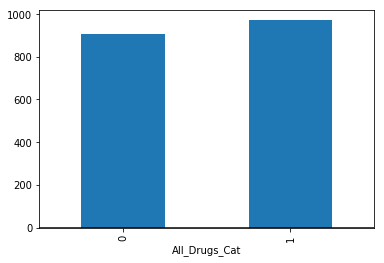

In [646]:
gb = df_drug_numeric.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

We see a nearly even split between the two categories.  Now let's try a correlation matrix and see the most significant correlations with the target.

In [647]:
pd.options.display.max_rows = 35
correlations = df_drug_numeric.corr()
correlations = correlations[targetName]
correlations = correlations[1:,] 
correlations.sort_values(ascending=False)

SS                             0.4615102246
Country_USA                    0.4266797553
O_Score                        0.3570833294
Impulsivenesss                 0.3334914634
Age_18-24                      0.3147979000
Gender_Male                    0.3032609237
N_Score                        0.1437142176
Country_Other_Country          0.1011115412
Country_Australia              0.0852742850
Ethnicity_Other                0.0534471872
Country_Ireland                0.0484334817
Ethnicity_Mixed-Black/Asian    0.0386895439
Country_Canada                 0.0356992137
Ethnicity_White                0.0255076498
Ethnicity_Mixed-White/Asian    0.0172822612
Age_25-34                      0.0169708152
Country_New Zealand            0.0086064411
Ethnicity_Mixed-White/Black   -0.0087213698
E_Score                       -0.0129454391
Ethnicity_Asian               -0.0643520333
Ethnicity_Black               -0.0896704399
Age_65+                       -0.1017603943
Age_35-44                     -0

Most of the correlations here weren't too surprising.  Men use drugs more than women.  Younger people use drugs more than older.  Ethnicity had little correlation with drug use.  The biggest surprise to me was the large discrepancy between different countries, all of which (expect 'other', which is unknown) are western primarily English-speaking countries.  Amongst the personality metrics, sensation, openness to experience, impulsiveness, and neuorticism correlated with heavier drug use.  Concientiousness, agreeableness, and extraversion correlated with less drug use.

# Models
Now we'll explore different models.

### KNN
First we'll do a K Nearest Neighbor model with default settings. 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(knn) 
#Fit knn to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [77]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.819057104914
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.90      0.88     11360
     > $50K       0.65      0.57      0.61      3700

avg / total       0.81      0.82      0.81     15060

Confusion Matrix
[[10222  1138]
 [ 1587  2113]]
Confusion Matrix Percent
[[ 67.875166     7.5564409 ]
 [ 10.53784861  14.03054449]]


We see that the KNN classifier with default settings had an accuracy of 81.9%.  Now let's do a grid search on the number of neighbors and see the best solution.

In [78]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,9,12,15,20,30,40,50]}
# run grid search
grid_search = GridSearchCV(knn, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_neighbors': 20}
Best Score: 0.833698030635
Best Estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.009965,51.692430,0.815463,0.893235,3,{'n_neighbors': 3},10,0.812863,0.894898,0.815183,...,0.818167,0.890961,0.815318,0.893742,0.815785,0.892752,0.431869,0.582183,0.001690,0.001324
1,2.634378,58.908670,0.822359,0.872978,5,{'n_neighbors': 5},9,0.816509,0.872850,0.823802,...,0.824797,0.873679,0.823442,0.871985,0.823247,0.872778,0.325751,0.702091,0.002974,0.000619
2,2.668756,64.310816,0.827167,0.864357,7,{'n_neighbors': 7},8,0.825791,0.864354,0.823305,...,0.828278,0.862862,0.830570,0.864816,0.827889,0.864614,0.238282,0.797516,0.002455,0.000791
3,2.946881,68.486197,0.830283,0.858572,9,{'n_neighbors': 9},7,0.827781,0.858925,0.826952,...,0.830764,0.857765,0.835046,0.858931,0.830874,0.858854,0.654360,1.497782,0.002851,0.000451
4,2.846881,72.971177,0.830946,0.852787,12,{'n_neighbors': 12},6,0.828278,0.851755,0.825626,...,0.829272,0.851962,0.838859,0.853792,0.832698,0.852596,0.309264,1.431546,0.004559,0.000880
5,2.471877,76.615004,0.832438,0.850797,15,{'n_neighbors': 15},4,0.828941,0.851962,0.828278,...,0.829935,0.850015,0.840849,0.850477,0.834190,0.850358,0.260596,1.083131,0.004682,0.000694
6,2.703131,81.219792,0.833698,0.846719,20,{'n_neighbors': 20},1,0.829604,0.848564,0.832422,...,0.832753,0.846450,0.838528,0.846291,0.835185,0.845966,0.278985,1.451774,0.002994,0.000936
7,2.696878,88.345418,0.833499,0.841829,30,{'n_neighbors': 30},2,0.827449,0.843922,0.830764,...,0.832919,0.841311,0.839854,0.840406,0.836511,0.841656,0.511262,1.355827,0.004333,0.001158
8,2.800004,93.644289,0.832836,0.839276,40,{'n_neighbors': 40},3,0.828278,0.840400,0.828775,...,0.832587,0.839281,0.839357,0.837837,0.835185,0.839625,0.352641,1.942850,0.004132,0.000832
9,2.884380,96.951520,0.831344,0.836881,50,{'n_neighbors': 50},5,0.825791,0.837664,0.827946,...,0.829438,0.837167,0.837036,0.835765,0.836511,0.836269,0.465471,4.030956,0.004585,0.000742


The grid search revealed that n=20 is the best solution.  Let's run the model with that parameter and see the result.    

In [79]:
knn = KNeighborsClassifier(n_neighbors=20)
#Call up the model to see the parameters you can tune (and their default setting)
print(knn)
#Fit clf to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


In [80]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.830942895086
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.92      0.89     11360
     > $50K       0.70      0.56      0.62      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10458   902]
 [ 1644  2056]]
Confusion Matrix Percent
[[ 69.44223108   5.98937583]
 [ 10.91633466  13.65205843]]


Accuracy improved from 81.9% to 83.1% using n=20 in the KNN.

Now we'll use a Manhattan distance in the KNN to see how it compares to the Euclidean. 

In [81]:
knn = KNeighborsClassifier(n_neighbors=20, p=1)
#Fit clf to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

In [82]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.830478087649
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.92      0.89     11360
     > $50K       0.70      0.54      0.61      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10499   861]
 [ 1692  2008]]
Confusion Matrix Percent
[[ 69.71447543   5.71713147]
 [ 11.23505976  13.33333333]]


Accuracy declined slightly when using Manhattan distances.  Thus, Euclidean distance (p=2) was determined to be optimal.  

Now let's cross validate.

In [83]:
#verify KNN with Cross Validation
knn = KNeighborsClassifier(n_neighbors=20, p=2) #next 3 lines rerun code for best tweaked solution for later use
knn.fit(features_train, target_train)
target_predicted_knn = knn.predict(features_test)
scores_knn = cross_val_score(knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores_knn)
print("Mean cross validation score", scores_knn.mean())

Cross Validation Score for each K [ 0.83095791  0.83327809  0.83592973  0.83128936  0.83753316  0.82625995
  0.83653846  0.84316976  0.8384743   0.8331675 ]
Mean cross validation score 0.834659820514


The cross validation scores look consistant, suggesting this model is not overfit.

### Decision Tree
Now we'll use a decision tree model, starting with default settings. 

In [84]:
#Decision Tree train model
from sklearn import tree 
clf = tree.DecisionTreeClassifier(random_state=123)
print(clf)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
DT Accuracy Score 0.796082337317
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.86      0.86     11360
     > $50K       0.58      0.59      0.59      3700

avg / total       0.80      0.80      0.80     15060

Confusion Matrix
[[9810 1550]
 [1521 2179]]
Confusion Matrix Percent
[[ 65.13944223  10.29216467]
 [ 10.09960159  14.4687915 ]]


We see that the decision tree classifier with default settings had an accuracy of 79.6%.  

Now let's tweak the parameters to see if we can get better results.  Let's start with a grid serach on max depth of the tree.

In [85]:
param_grid = {"max_depth": [3,4,5,6,7,8,9,10,15,20]}
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_depth': 9}
Best Score: 0.853391684902
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.290104,0.012499,0.840263,0.840329,3,{'max_depth': 3},8,0.834245,0.841767,0.835405,...,0.843030,0.839654,0.847646,0.838500,0.840988,0.840164,0.030796,6.249690e-03,0.004950,0.001218
1,0.475000,0.009373,0.840926,0.841688,4,{'max_depth': 4},7,0.833250,0.842264,0.835737,...,0.843362,0.839985,0.846651,0.838707,0.845631,0.845634,0.033656,7.653215e-03,0.005416,0.002354
2,0.568757,0.015624,0.842815,0.845285,5,{'max_depth': 5},6,0.837063,0.846782,0.837726,...,0.842864,0.843881,0.845159,0.841442,0.851268,0.850193,0.041457,2.953312e-06,0.005214,0.002980
3,0.790628,0.018746,0.848783,0.851800,6,{'max_depth': 6},5,0.844853,0.854490,0.843693,...,0.851649,0.850139,0.851790,0.849399,0.851932,0.852223,0.077562,6.247902e-03,0.003702,0.001835
4,0.912500,0.012500,0.850540,0.855033,7,{'max_depth': 7},4,0.846014,0.856273,0.846677,...,0.852312,0.853247,0.854277,0.853378,0.853424,0.856202,0.041458,1.169240e-02,0.003488,0.001407
5,1.071879,0.015624,0.851668,0.859252,8,{'max_depth': 8},3,0.846842,0.861412,0.849494,...,0.850157,0.856190,0.856432,0.857315,0.855414,0.860387,0.046978,9.881439e-03,0.003661,0.002097
6,1.081253,0.021876,0.853392,0.864772,9,{'max_depth': 9},1,0.847340,0.866095,0.850986,...,0.854136,0.864147,0.857759,0.862578,0.856740,0.865401,0.084085,1.249890e-02,0.003828,0.001273
7,0.956254,0.015625,0.852066,0.869107,10,{'max_depth': 10},2,0.843693,0.870529,0.848997,...,0.854799,0.868664,0.857593,0.866639,0.855248,0.870167,0.028641,2.198628e-06,0.005053,0.001387
8,1.271877,0.015624,0.838207,0.901979,15,{'max_depth': 15},9,0.835903,0.904347,0.833582,...,0.835571,0.899001,0.847480,0.901699,0.838501,0.901040,0.033658,8.529922e-07,0.004893,0.001938
9,1.303129,0.009374,0.825608,0.938714,20,{'max_depth': 20},10,0.818333,0.944631,0.820322,...,0.826455,0.934933,0.834218,0.936593,0.828718,0.935767,0.095089,7.653682e-03,0.005751,0.003771


The grid search showed that the best max depth is 9.  Let's run the model again with that figure.

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DT Accuracy Score 0.841965471448
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.91      0.90     11360
     > $50K       0.70      0.63      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10347  1013]
 [ 1367  2333]]
Confusion Matrix Percent
[[ 68.70517928   6.72642762]
 [  9.07702523  15.49136786]]


Accuracy increased from 79.6% to 84.2% with this change.  The number of false positives in particular dropped significantly, from 10.3% to 6.7%.  

Now we'll try the decision tree using information gain vice Gini impurity for the split quality criterion.

In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DT Accuracy Score 0.840637450199
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.91      0.90     11360
     > $50K       0.69      0.63      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10335  1025]
 [ 1375  2325]]
Confusion Matrix Percent
[[ 68.62549801   6.8061089 ]
 [  9.13014608  15.43824701]]


Accuracy dropped slightly using information gain (84.1% vice 84.2%). 

Now we'll cross validate the decision tree, using the Gini impurity as that was more accurate.

In [88]:
#verify DT with Cross Validation
clf = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
target_predicted_dt = clf.predict(features_test)
scores = cross_val_score(clf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.83990719  0.84852502  0.85382831  0.84686775  0.84714854  0.85377984
  0.85046419  0.85775862  0.85936982  0.85207297]


0.85097222528225969

The cross validation scores for the decision tree are fairly close together, suggesting this model isn't overfit.

###Random Forest
Now we'll try the random forest.  

In [89]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf = rf.fit(features_train, target_train)
print(rf)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
RF Accuracy Score 0.837383798141
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.92      0.90     11360
     > $50K       0.71      0.57      0.63      3700

avg / total       0.83      0.84      0.83     15060

Confusion Matrix
[[10505   855]
 [ 1594  2106]]
Confusion Matrix Percent
[[ 69.75431607   5.67729084]
 [ 10.58432935  13.98406375]]


The random forest with default settings had an accuracy of 83.7%.  Let's do a grid seach of the numner of estimators.

In [90]:
param_grid = {"n_estimators": [10,20,40,60,80,100,150,200,250,300,350,400,500]}
# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_estimators': 100}
Best Score: 0.854154233804
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.637499,0.065628,0.846031,0.987592,10,{'n_estimators': 10},13,0.845185,0.988769,0.843196,...,0.844025,0.987235,0.853780,0.986780,0.843973,0.986863,0.132724,0.011688,0.003926,0.000803
1,3.790419,0.165627,0.850176,0.995740,20,{'n_estimators': 20},12,0.850655,0.995938,0.848500,...,0.848500,0.995980,0.854609,0.995276,0.848615,0.995442,0.318657,0.028979,0.002364,0.000318
2,7.896889,0.262500,0.851867,0.998939,40,{'n_estimators': 40},11,0.851152,0.999254,0.849329,...,0.849660,0.998922,0.856101,0.999047,0.853092,0.998384,0.498883,0.015312,0.002500,0.000297
3,11.809397,0.412503,0.852430,0.999776,60,{'n_estimators': 60},10,0.852644,0.999834,0.847174,...,0.850820,0.999751,0.858753,0.999834,0.852761,0.999668,0.309741,0.060600,0.003751,0.000062
4,15.493070,0.528126,0.853325,0.999851,80,{'n_estimators': 80},7,0.852644,0.999793,0.848997,...,0.853638,0.999917,0.857924,0.999917,0.853424,0.999876,0.124685,0.041224,0.002845,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,48.385806,1.609378,0.853226,0.999975,250,{'n_estimators': 250},9,0.853307,1.000000,0.850323,...,0.851318,0.999959,0.858090,1.000000,0.853092,0.999959,0.499808,0.211256,0.002674,0.000020
9,57.736316,1.828129,0.853259,0.999975,300,{'n_estimators': 300},8,0.852644,1.000000,0.849660,...,0.852147,0.999959,0.858256,1.000000,0.853590,0.999959,0.373205,0.022097,0.002816,0.000020
10,67.482784,2.142336,0.853624,0.999975,350,{'n_estimators': 350},4,0.854136,1.000000,0.849494,...,0.852147,0.999959,0.857593,1.000000,0.854750,0.999959,0.217008,0.060649,0.002703,0.000020
11,77.473933,2.734377,0.853591,0.999975,400,{'n_estimators': 400},5,0.854136,1.000000,0.848334,...,0.853473,0.999959,0.857427,1.000000,0.854585,0.999959,0.399607,0.368566,0.002955,0.000020


The grid search determined a n estimators value of 100 as optimal.  Now let's run the model with that figure.

In [76]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state=123)
rf = rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RF Accuracy Score 0.844090305445
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.92      0.90     11360
     > $50K       0.72      0.60      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10480   880]
 [ 1468  2232]]
Confusion Matrix Percent
[[ 69.58831341   5.84329349]
 [  9.74767596  14.82071713]]


The model improved with a modest rise in accuracy from 83.7% to 84.4%.

Now let's try chaning the class weight to the 'balanced', where columns with a greater count have more weight.

In [77]:
# train random forest model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, class_weight='balanced', random_state=123)
rf = rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RF Accuracy Score 0.84395750332
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.72      0.60      0.65      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10508   852]
 [ 1498  2202]]
Confusion Matrix Percent
[[ 69.77423639   5.65737052]
 [  9.94687915  14.62151394]]


The accuracy decreased slightly but still rounds to 84.4%.

Now let's cross validate the random forest model.

In [78]:
#verify RF with cross validation
rf = RandomForestClassifier(n_estimators= 100, random_state=123) #best tweaked solution above
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [ 0.83891283  0.85946304  0.85051376  0.8471992   0.85709549  0.8494695
  0.8561008   0.85941645  0.85903814  0.84875622]


0.85259654196059564

The cross validation results are consistant, suggesting the model isn't overfit.

###Support Vector Machine - Linear

Now let's try a linear SVM with default settings.  

In [37]:
#from sklearn import svm
from sklearn.svm import SVC
linsvm = SVC(kernel='linear', probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print(linsvm)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
other svc Accuracy Score 0.847543160691
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.60      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10530   830]
 [ 1466  2234]]
Confusion Matrix Percent
[[ 69.92031873   5.51128818]
 [  9.73439575  14.83399734]]


The default settings produced an accuracy of 84.8%.  Let's try a grid search of the penalty parameter.

In [39]:
param_grid = {'C':[1,5,10,15,20]}

grid_search = GridSearchCV(linsvm, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)


print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'C': 10}
Best Score: 0.846827133479
Best Estimator SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1213.355169,24.631265,0.845932,0.848037,1,{'C': 1},5,0.841372,0.848730,0.842533,...,0.847174,0.848481,0.848972,0.846498,0.849610,0.847085,7.905853,0.461572,0.003366,0.001076
1,1280.917448,23.718765,0.846595,0.848949,5,{'C': 5},3,0.843030,0.850305,0.843527,...,0.847340,0.849559,0.848806,0.846830,0.850274,0.847913,10.501179,0.230276,0.002867,0.001356
2,1340.921759,23.459390,0.846827,0.849007,10,{'C': 10},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.847120,0.850937,0.847872,8.364369,0.553893,0.002751,0.001270
3,1393.728676,23.118766,0.846794,0.848966,15,{'C': 15},2,0.844356,0.850139,0.843527,...,0.847174,0.849434,0.848309,0.847244,0.850605,0.847748,15.020301,0.532957,0.002591,0.001243
4,1307.180304,19.578143,0.846562,0.848941,20,{'C': 20},4,0.844190,0.850097,0.843196,...,0.846677,0.849434,0.848309,0.847120,0.850439,0.847789,239.990557,4.501596,0.002648,0.001263


The grid search revealed a C of 10 as best. Let's run the model with that parameter.

In [40]:
linsvm = SVC(C=10, kernel='linear', probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

other svc Accuracy Score 0.847875166003
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10519   841]
 [ 1450  2250]]
Confusion Matrix Percent
[[ 69.84727756   5.58432935]
 [  9.62815405  14.94023904]]


Accuracy increased slightly but is virtually unchanged.  Now let's try a grid search of the degree of the polynomial function.

In [42]:
param_grid = {'degree':[1,2,3,4,5]}

grid_search = GridSearchCV(linsvm, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)


print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'degree': 1}
Best Score: 0.846827133479
Best Estimator SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_degree,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1342.590867,23.746890,0.846827,0.849007,1,{'degree': 1},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,12.942726,0.742633,0.002751,0.00127
1,1339.347711,23.265639,0.846827,0.849007,2,{'degree': 2},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,10.185917,0.512253,0.002751,0.00127
2,1338.544585,23.462514,0.846827,0.849007,3,{'degree': 3},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,14.793538,0.305004,0.002751,0.00127
3,1338.397711,23.290639,0.846827,0.849007,4,{'degree': 4},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,13.677162,0.501815,0.002751,0.00127
4,1212.723884,21.259387,0.846827,0.849007,5,{'degree': 5},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,250.364330,4.835949,0.002751,0.00127


The grid search revelaed a degree of 1 to be best, though it's effectivly tied with the other degrees per the grid search above.  Let's run the model with that figure.

In [44]:
linsvm = SVC(C=10, kernel='linear', degree=1, probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

other svc Accuracy Score 0.847875166003
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10519   841]
 [ 1450  2250]]
Confusion Matrix Percent
[[ 69.84727756   5.58432935]
 [  9.62815405  14.94023904]]


Accuracy is virtually unchanged.  Now let's cross validate.

In [45]:
#verify Linear SVC with Cross Validation
scores = cross_val_score(linsvm, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.8435532   0.84653629  0.84819357  0.83924428  0.84615385  0.85013263
  0.84615385  0.84913793  0.85538972  0.84742952]


0.84719248315292117

The cross validation scores for the linear SVC are fairly close together, suggesting this model isn't overfit.

###SVM-RBF 
Now let's try the SVM-RBF with default parameters.  

In [53]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel='rbf', random_state=123) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
print(clf_rbf)
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
RBF Accuracy Score 0.827224435591
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.91      0.89     11360
     > $50K       0.68      0.57      0.62      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10358  1002]
 [ 1600  2100]]
Confusion Matrix Percent
[[ 68.77822045   6.65338645]
 [ 10.62416999  13.94422311]]


The model calculates 82.7% accuracy.  Now let's run a grid search of the penalty parameter, C. 

In [54]:
param_grid = {'C':[.5,1,5,10,15,20]}
grid_search = GridSearchCV(clf_rbf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'C': 20}
Best Score: 0.843147006167
Best Estimator SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,199.820558,29.068766,0.818679,0.819118,0.5,{'C': 0.5},6,0.822311,0.820962,0.813691,...,0.812200,0.817813,0.829410,0.821384,0.815785,0.817165,1.626299,0.382428,0.006381,0.001719
1,196.542675,28.128142,0.823122,0.823984,1,{'C': 1},5,0.826952,0.827137,0.817006,...,0.817338,0.822330,0.834052,0.825528,0.820262,0.822096,1.025101,0.448240,0.006529,0.001998
2,183.084490,26.428143,0.835522,0.836931,5,{'C': 5},4,0.835074,0.838410,0.830433,...,0.835074,0.836089,0.841844,0.835433,0.835185,0.836352,1.443149,0.484385,0.003644,0.001228
3,181.390741,25.881264,0.838439,0.840238,10,{'C': 10},3,0.838720,0.841436,0.833582,...,0.839383,0.839073,0.843170,0.839121,0.837340,0.840454,2.196188,0.462943,0.003103,0.000983
4,181.381365,25.903141,0.841058,0.843106,15,{'C': 15},2,0.841870,0.844005,0.837394,...,0.840875,0.841104,0.845656,0.842644,0.839496,0.842858,3.169261,0.263205,0.002746,0.001294
5,158.227068,21.637511,0.843147,0.845203,20,{'C': 20},1,0.844688,0.846160,0.838555,...,0.842864,0.843549,0.848806,0.844965,0.840822,0.844101,30.621704,4.281204,0.003492,0.001346


The grid search shows that the best C is 20.  Let's run the model with that value.

In [55]:
clf_rbf = SVC(kernel='rbf', C=20.0, random_state=123) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
# summarize the fit of the model
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

RBF Accuracy Score 0.842762284197
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.93      0.90     11360
     > $50K       0.73      0.58      0.64      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10551   809]
 [ 1559  2141]]
Confusion Matrix Percent
[[ 70.05976096   5.37184595]
 [ 10.35192563  14.21646746]]


The model showed am improvement from 82.7% to 84.3% accuracy.  Now let's try it with a class weight of balanced. 

In [56]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel='rbf', C=20, random_state=123, class_weight='balanced') #degree=3, gamma=0.1)
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
# summarize the fit of the model
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

RBF Accuracy Score 0.791965471448
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.94      0.77      0.85     11360
     > $50K       0.55      0.85      0.67      3700

avg / total       0.85      0.79      0.80     15060

Confusion Matrix
[[8771 2589]
 [ 544 3156]]
Confusion Matrix Percent
[[ 58.24037185  17.19123506]
 [  3.6122178   20.9561753 ]]


Performance dropped from 84.3% to 79.2% accuracy with the balanced setting, so we won't use that setting.

Now we'll cross validate the SVC-RBF.

In [57]:
#verify SVC-RBF with Cross Validation
clf_rbf = SVC(kernel='rbf', C=20.0, random_state=123, probability=True) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
scores = cross_val_score(clf_rbf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.83891283  0.84852502  0.84255883  0.833941    0.8494695   0.83919098
  0.84980106  0.84781167  0.84676617  0.8371476 ]


0.84341246605033382

The cross validation scores for the SVC-RBF are fairly close together, suggesting this model isn't overfit.

###ANN

Now let's try the ANN with default settings.

In [58]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(random_state=123) 
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print(clf_NN)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
NN Accuracy Score 0.848671978752
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.67      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10518   842]
 [ 1437  2263]]
Confusion Matrix Percent
[[ 69.84063745   5.59096946]
 [  9.54183267  15.02656042]]


The neural net had an accuracy score of 84.9%.  First let's find the optimal L2 penalty via a grid search. 

In [59]:
param_grid = {'alpha':[.0000001,.000001,.00001,.0001,.001,.01,.1,.3,.5]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'alpha': 0.01}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,98.142757,0.049997,0.849977,0.868734,1e-07,{'alpha': 1e-07},3,0.847008,0.866468,0.846179,...,0.852975,0.869866,0.849138,0.869706,0.854585,0.868095,12.059963,0.006250,0.003291,0.001297
1,93.043809,0.043752,0.848916,0.868560,1e-06,{'alpha': 1e-06},6,0.846345,0.866841,0.844522,...,0.852312,0.869452,0.848475,0.869581,0.852927,0.867183,11.082648,0.006250,0.003278,0.001272
2,91.181305,0.050008,0.849579,0.869372,1e-05,{'alpha': 1e-05},5,0.847505,0.867089,0.845682,...,0.850655,0.871358,0.847977,0.869333,0.856077,0.869007,10.864212,0.011690,0.003617,0.001399
3,90.993808,0.046880,0.850507,0.868692,0.0001,{'alpha': 0.0001},2,0.847174,0.866799,0.848334,...,0.851981,0.870198,0.849469,0.869043,0.855580,0.868054,10.619945,0.009880,0.002994,0.001169
4,84.562556,0.043753,0.849778,0.868402,0.001,{'alpha': 0.001},4,0.846014,0.866302,0.846842,...,0.849826,0.868291,0.850464,0.868960,0.855745,0.869297,4.018548,0.011691,0.003431,0.001106
5,73.875046,0.050003,0.850772,0.865576,0.01,{'alpha': 0.01},1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,7.449164,0.006248,0.004972,0.001402
6,40.968775,0.050000,0.848352,0.852405,0.1,{'alpha': 0.1},7,0.844688,0.850843,0.843362,...,0.851815,0.853703,0.856598,0.851678,0.845299,0.849985,8.294496,0.006251,0.005053,0.002105
7,25.978144,0.043748,0.841821,0.843810,0.3,{'alpha': 0.3},8,0.843362,0.842969,0.833085,...,0.841372,0.843922,0.846320,0.842685,0.844968,0.843728,6.443358,0.006246,0.004670,0.001071
8,21.950011,0.037500,0.839102,0.840122,0.5,{'alpha': 0.5},9,0.839715,0.839985,0.832587,...,0.835737,0.840938,0.845988,0.840116,0.841486,0.840164,3.433784,0.007652,0.004631,0.000490


The grid search found an alpha of 0.01, so let's run the model with that.

In [60]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(alpha=0.01, random_state=123)
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

NN Accuracy Score 0.849070385126
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.74      0.59      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10591   769]
 [ 1504  2196]]
Confusion Matrix Percent
[[ 70.32536521   5.1062417 ]
 [  9.98671979  14.58167331]]


Accuracy increased slightly but still rounds to 84.9%.  Now let's try adjusting the layer sizes (number of neurons) in the neural net via grid search.

In [61]:
param_grid = {'hidden_layer_sizes':[(2,),(5,),(10,),(50,),(100,),(200,),(400,)]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'hidden_layer_sizes': (100,)}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,42.115970,0.015623,0.847855,0.850292,"(2,)","{'hidden_layer_sizes': (2,)}",6,0.844522,0.851382,0.842035,...,0.851152,0.850926,0.851790,0.849192,0.849776,0.848991,3.547946,0.000004,0.003874,0.000995
1,23.703139,0.015627,0.848220,0.849156,"(5,)","{'hidden_layer_sizes': (5,)}",5,0.845019,0.849766,0.843693,...,0.850489,0.848978,0.853282,0.848363,0.848615,0.849447,1.526172,0.000002,0.003512,0.000474
2,33.193773,0.015625,0.850043,0.853765,"(10,)","{'hidden_layer_sizes': (10,)}",2,0.847505,0.855402,0.844688,...,0.852147,0.854739,0.851956,0.852549,0.853921,0.852679,7.829595,0.000006,0.003413,0.001130
3,58.868785,0.028125,0.849513,0.863661,"(50,)","{'hidden_layer_sizes': (50,)}",4,0.844025,0.865183,0.846345,...,0.851152,0.863235,0.851127,0.861210,0.854916,0.863827,9.800606,0.006251,0.003864,0.001411
4,75.787553,0.046874,0.850772,0.865576,"(100,)","{'hidden_layer_sizes': (100,)}",1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,18.023311,0.013968,0.004972,0.001402
5,98.315688,0.106250,0.849910,0.866256,"(200,)","{'hidden_layer_sizes': (200,)}",3,0.845848,0.867131,0.844356,...,0.849992,0.867255,0.854443,0.869167,0.854916,0.861340,15.953529,0.026882,0.004312,0.002624
6,170.538053,0.146872,0.847722,0.867515,"(400,)","{'hidden_layer_sizes': (400,)}",7,0.837394,0.861494,0.845848,...,0.854301,0.870736,0.851625,0.871073,0.849445,0.867846,43.205338,0.027242,0.005860,0.003481


The grid serach determined 100 as the optimal hidden layer size.  Let's do a grid search on the length.

In [62]:
param_grid = {'hidden_layer_sizes':[(100,),(100,2),(100,4),(100,6),(100,8)]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'hidden_layer_sizes': (100,)}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,73.369224,0.043753,0.850772,0.865576,"(100,)","{'hidden_layer_sizes': (100,)}",1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,7.075503,0.006253,0.004972,0.001402
1,114.341985,0.046874,0.847557,0.869588,"(100, 2)","{'hidden_layer_sizes': (100, 2)}",4,0.844025,0.866219,0.842533,...,0.849494,0.868167,0.851459,0.870990,0.850274,0.870830,14.796522,0.000002,0.003580,0.002072
2,85.018802,0.050005,0.848651,0.865592,"(100, 4)","{'hidden_layer_sizes': (100, 4)}",3,0.848831,0.864520,0.844356,...,0.848666,0.865473,0.848972,0.869416,0.852429,0.865526,16.146463,0.006246,0.002563,0.002115
3,63.737539,0.053128,0.849678,0.868618,"(100, 6)","{'hidden_layer_sizes': (100, 6)}",2,0.850157,0.868581,0.841538,...,0.850820,0.869410,0.850133,0.865562,0.855745,0.868965,5.694844,0.007654,0.004578,0.001668
4,73.621920,0.043753,0.846827,0.870441,"(100, 8)","{'hidden_layer_sizes': (100, 8)}",5,0.848003,0.874135,0.837560,...,0.844522,0.868208,0.849469,0.869001,0.854585,0.871700,17.381836,0.011694,0.005652,0.002187


The default was optimal.  Now let's run the model with the layers/nodes results from the grid search.

In [63]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, ), random_state=123) 
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

NN Accuracy Score 0.849070385126
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.74      0.59      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10591   769]
 [ 1504  2196]]
Confusion Matrix Percent
[[ 70.32536521   5.1062417 ]
 [  9.98671979  14.58167331]]


Accuracy was unchanged.  Now let's cross validate.

In [64]:
#verify NN with Cross Validation

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.85084521  0.84918794  0.84819357  0.8435532   0.84781167  0.85311671
  0.8428382   0.85344828  0.85704809  0.85339967]


0.84994425291271136

The cross validation results are similar to each other, suggesting the model isn't overfit.

###Stochastic Gradient Descent

Now we'll try to Stochastic Gradient Descent with default settings.  (Exception: the loss function is set to 'log', so it uses a logistic regression, not a linear one.  This is more appropriate for what we're trying to do - predict above/below $50K, and allows for calculation of area under the ROC curve later). 

In [65]:
from sklearn import linear_model
clf_sgd = linear_model.SGDClassifier(loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
print(clf_sgd)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))


D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)
SGD Accuracy Score 0.829747675963
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.84      0.96      0.89     11360
     > $50K       0.78      0.43      0.55      3700

avg / total       0.82      0.83      0.81     15060

Confusion Matrix
[[10908   452]
 [ 2112  1588]]
Confusion Matrix Percent
[[ 72.43027888   3.00132802]
 [ 14.02390438  10.54448871]]


The SGD achieved an accuracy of 83.0%  Let's try adjusting the regularization term, alpha, with a grid search.

In [66]:
param_grid = {"alpha": [0.00001,0.0001,0.001,0.01,0.1,.5,1,2,5,10]}
# run grid search
grid_search = GridSearchCV(clf_sgd, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Best Params: {'alpha': 0.0001}
Best Score: 0.833830647835
Best Estimator SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.362490,0.012496,0.797825,0.801357,1e-05,{'alpha': 1e-05},4,0.811371,0.821335,0.805404,...,0.823637,0.825397,0.753813,0.748695,0.794893,0.795284,0.075501,0.006248,0.023886,0.028298
1,0.412502,0.009377,0.833831,0.834129,0.0001,{'alpha': 0.0001},1,0.831759,0.836338,0.834576,...,0.840212,0.839363,0.838196,0.834107,0.824407,0.821226,0.048007,0.012503,0.005539,0.006765
2,0.412502,0.015624,0.833366,0.834751,0.001,{'alpha': 0.001},2,0.829604,0.836131,0.829604,...,0.831261,0.835426,0.841678,0.833527,0.834687,0.834280,0.032174,0.013975,0.004551,0.000918
3,0.374999,0.018751,0.817784,0.818621,0.01,{'alpha': 0.01},3,0.813691,0.817978,0.815183,...,0.819161,0.818517,0.821784,0.817033,0.819101,0.820604,0.048413,0.015310,0.002938,0.001183
4,0.421874,0.006248,0.751078,0.751078,0.1,{'alpha': 0.1},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.034227,0.007653,0.000053,0.000013
5,0.512500,0.003126,0.751078,0.751078,0.5,{'alpha': 0.5},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.063586,0.006252,0.000053,0.000013
6,0.400000,0.012502,0.751078,0.751078,1,{'alpha': 1},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.025388,0.006251,0.000053,0.000013
7,0.390626,0.009375,0.751078,0.751078,2,{'alpha': 2},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.029648,0.007655,0.000053,0.000013
8,0.412497,0.012501,0.751078,0.751078,5,{'alpha': 5},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.037761,0.006251,0.000053,0.000013
9,0.409374,0.009375,0.751078,0.751078,10,{'alpha': 10},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.076802,0.007655,0.000053,0.000013


The grid serach found an alpha of 0.001 as best, so let's run the model with that.

In [67]:
clf_sgd = linear_model.SGDClassifier(alpha=0.001, loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD Accuracy Score 0.834926958831
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.93      0.90     11360
     > $50K       0.72      0.53      0.61      3700

avg / total       0.83      0.83      0.83     15060

Confusion Matrix
[[10596   764]
 [ 1722  1978]]
Confusion Matrix Percent
[[ 70.35856574   5.07304117]
 [ 11.43426295  13.13413015]]


Accuracy increased slightly from 83.0% to 83.5%.  Since the default setting relies on L2, let's set the model to L1 and see the results.

In [68]:
clf_sgd = linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD Accuracy Score 0.840239043825
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.94      0.90     11360
     > $50K       0.74      0.55      0.63      3700

avg / total       0.83      0.84      0.83     15060

Confusion Matrix
[[10631   729]
 [ 1677  2023]]
Confusion Matrix Percent
[[ 70.59096946   4.84063745]
 [ 11.13545817  13.43293493]]


Model accuracy increased slightly using L1, from 83.5% to 84.0%.  

Now we'll cross validate the SGD.

In [69]:
#verify SGD with Cross Validation

scores = cross_val_score(clf_sgd, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\skle

Cross Validation Score for each K [ 0.83427246  0.84023865  0.83791846  0.83162082  0.84084881  0.83852785
  0.8418435   0.85079576  0.84809287  0.83217247]


0.83963316362595486

The cross validation scores for the SGD are fairly close together, suggesting this model isn't overfit.

###Adaboost 

Now we'll try to Ada Boost, this time with the Decision Tree as the base learner (with a max depth of 9, which was the best result achieved above).  

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,random_state=123))#, algorithm="SAMME", n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
print("Adaboost Accuracy Score", accuracy_score(target_test, predicted_bdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bdt))/len(target_test.index))

Adaboost Accuracy Score 0.808897742364
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.89      0.88     11360
     > $50K       0.62      0.56      0.59      3700

avg / total       0.80      0.81      0.81     15060

Confusion Matrix
[[10095  1265]
 [ 1613  2087]]
Confusion Matrix Percent
[[ 67.03187251   8.3997344 ]
 [ 10.71049137  13.85790173]]


With the decision tree classifier as its base, an accuracy of 80.9% was achieved, which is worse than the 84.2% achieved by the decision tree alone.  Let's try it now with a SGD.

In [73]:
from sklearn.ensemble import AdaBoostClassifier
bsgd = AdaBoostClassifier(linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123), algorithm='SAMME') #, , n_estimators=200)
bsgd.fit(features_train, target_train)
predicted_bsgd=bsgd.predict(features_test)
print("Adaboost Accuracy Score", accuracy_score(target_test, predicted_bsgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bsgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bsgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bsgd))/len(target_test.index))

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Adaboost Accuracy Score 0.754316069057
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.75      1.00      0.86     11360
     > $50K       0.00      0.00      0.00      3700

avg / total       0.57      0.75      0.65     15060

Confusion Matrix
[[11360     0]
 [ 3700     0]]
Confusion Matrix Percent
[[ 75.43160691   0.        ]
 [ 24.56839309   0.        ]]


D:\mlatw\Anaconda36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model didn't predict any values above $50K!  Obviously we wouldn't use this.  Now let's cross validate the AdaBoost using decisioon tree as the base estimator.

In [81]:
#verify ADA Boost with Cross Validation
scores = cross_val_score(bdt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.82200862  0.81339079  0.81305933  0.80543586  0.81730769  0.81863395
  0.81830239  0.82261273  0.8318408   0.81293532]


0.81755274806107825

The cross validation scores for the ADA Boost are fairly close together, suggesting this model isn't overfit.

###Bagging Classifier

Now we'll try the bagging classifier with the decision tree reached above as the base estimator.

In [ ]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),random_state=123)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

The bagging classifier had an accuracy of 84.6%.  Now let's run a grid search to find the best value of the number of base estimators.

In [ ]:
param_grid = {"n_estimators": [2,5,7,10]}
# run grid search
grid_search = GridSearchCV(clf_bag, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search found a value of 200 estimators to be best.  Let's run the model with that.

In [ ]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123),n_estimators=200,random_state=123))
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

The model accuracy improved to 83.7%.  Now let's run a grid search to determine the impact on max sample size.

In [ ]:
param_grid = {"max_samples": [50,100,1000,5000,10000,15000]}
# run grid search
grid_search = GridSearchCV(clf_bag, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determmined a max_samples of 5000 was best.  Let's run the model with that figure.

In [ ]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(n_estimators=200,max_samples=5000,random_state=123)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

Accuracy increased to 84.8%.

Now we'll cross validate the bagging classifier.

In [ ]:
#verify Bagging Classifier with Cross Validation
scores = cross_val_score(clf_bag, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

The cross validation scores for the bagging classifier are fairly close together, suggesting this model isn't overfit.

###Gradient Boosting 
Now we'll run the gradient boosting classifier with default settings.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(random_state=123) #n_estimators=100, learning_rate=1.7, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
print(clf_GBC)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

The Gradient Boost with default settings found an accuracy of 85.8%.  Let's try a grid search on the number of estimators.

In [ ]:
param_grid = {"n_estimators": [50,100,250,500,750,1000]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determined the best number of estimators to be 500.  Let's run the model with that figure.

In [ ]:
clf_GBC = GradientBoostingClassifier(random_state=123, n_estimators=500) 
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

Accuracy is virtually unchanged.  Now let's do a grid search on the max depth of the tree.

In [ ]:
param_grid = {"max_depth": [1,2,3,4,6,7]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determined a max depth of 3 as optimal, which is the default setting.  Let's try a grid search on the learning rate to see the changes.

In [ ]:
param_grid = {"learning_rate": [0.001,0.01, 0.05, 0.08, 0.1, 0.12, 0.15]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determined a learning rate of 0.15 to be optimal.  Let's run the model with that figure. 

In [ ]:
clf_GBC = GradientBoostingClassifier(random_state=123, n_estimators=500, max_depth=3, learning_rate=0.15)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

Model performace is virtually unchanged.

In [ ]:
#verify GB with Cross Validation
scores = cross_val_score(clf_GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

The cross validation scores for the gradient boost are fairly close together, suggesting this model isn't overfit.

###Extra Trees



Now let's try the extra trees classifier with default settings.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(random_state=123)
xdt.fit(features_train, target_train)
print(xdt)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

The accuracy with default settings was 82.3%.  Let's do a grid search on the number of estimators.

In [ ]:
param_grid = {"n_estimators": [5,10,15,20,50,100]}
# run grid search
grid_search = GridSearchCV(xdt, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determined that 50 was the best value for the number of estimators.  Let's run the model with that figure.

In [ ]:
xdt = ExtraTreesClassifier(random_state=123, n_estimators=50) #max_depth=3,n_estimators=10,class_weight='balanced')
xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

Accuracy improved slightly to 82.6%.  Now let's run a grid search on the depth of the tree. 

In [ ]:
param_grid = {"max_depth": [5,10,15,20,25,30,35,50,100,250]}
# run grid search
grid_search = GridSearchCV(xdt, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

The grid search determined 25 to be the best depth.  Let's run the model with that number.

In [ ]:
xdt = ExtraTreesClassifier(random_state=123, n_estimators=50, max_depth=25) #max_depth=3,n_estimators=10,class_weight='balanced')
xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

Accuracy improved to 84.6%.  Now we'll cross validate the extra trees classifier.

In [ ]:
#verify XDT with Cross Validation

scores = cross_val_score(xdt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

The cross validation scores for the extra trees classifier are fairly close together, suggesting this model isn't overfit.

###Stacking

Now we'll stack 3 different models to see the result.  For the first stack we'll use KNN, Random Forest, and Extra Trees.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#stack_ada = AdaBoostClassifier(base_estimator=SVC(C=10, kernel='linear', degree=3, probability=True, random_state=123), algorithm="SAMME")
stack_xdt = ExtraTreesClassifier(random_state=123, n_estimators=50, max_depth=25)
stack_knn = KNeighborsClassifier(n_neighbors=20, p=2)
stack_rf = RandomForestClassifier(n_estimators= 100, random_state=123)
#stack_ada = AdaBoostClassifier(base_estimator=LinearSVC(random_state=123, penalty='l1', C=3, dual=False), algorithm="SAMME")
stack1 = VotingClassifier(estimators=[('rf', stack_rf), ('knn', stack_knn), ('xdt', stack_xdt)], voting='soft')
for MV, label in zip([stack_rf, stack_knn, stack_ada, stack1], ['Random Forest', 'K Nearest Neighbor', 'Extra Trees', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

The ensemble performed at 86%, or the same as the random forest, so the boost in performance wasn't noticeable.  Perhaps these three models are classifying most of the same instances incorrectly?

Now let's try a different stack with these three models: bagging, decision tree, and SGD.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier
from sklearn import linear_model
stack_bag = BaggingClassifier(n_estimators=200,max_samples=5000,random_state=123)
stack_dt = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
stack_sgd = linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123)

stack2 = VotingClassifier(estimators=[('dt', stack_dt), ('sgd', stack_sgd), ('bag', stack_bag)], voting='soft')
for MV, label in zip([stack_dt, stack_sgd, stack_bag, stack2], ['Decision Tree', 'Stochiastic Gradient Descent', 'Bagging', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Again, the ensemble model was the same as the highest rated model input.

Now let's try a different stack with linear SVC, Neural Network, and Gradient Boosting for the three input models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#stack_svml = LinearSVC(random_state=123, penalty='l1', C=3, dual=False)
stack_svml = SVC(C=10, kernel='linear', degree=3, probability=True, random_state=123)
stack_nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, ), random_state=123)
stack_gb = GradientBoostingClassifier(random_state=123, n_estimators=500, max_depth=3, learning_rate=0.15)
stack3 = VotingClassifier(estimators=[('svml', stack_svml), ('nn', stack_nn), ('gb', stack_gb)], voting='soft')
for MV, label in zip([stack_svml, stack_nn, stack_gb, stack3], ['Linear SVC', 'Neural Net', 'Gradient Boosting', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Again, the ensemble resulted in an accuracy of 0.86, and was actually less accurate the AdaBoost.  Next is some code to make predictions on the final stack that will be used to compare with other models later.

In [ ]:
stack3.fit(features_train, target_train)
predicted_stack3=stack3.predict(features_test)

Now let's cross validate the final stack.

In [ ]:
#verify stack with Cross Validation
scores = cross_val_score(stack3, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

The cross validation scores for the stack are fairly close together, suggesting this ensemble isn't overfit.

##Model Comparison

To compare the performance of these models, we'll take a look at some different metrics.  First, we'll calculate the area under the ROC curves and plot them:

In [ ]:
#calculate area under ROC curves
fpr_knn, tpr_knn, _ = roc_curve(target_test, knn.predict_proba(features_test)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(target_test, clf.predict_proba(features_test)[:,1]) 
fpr_rf, tpr_rf, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
fpr_lsvc, tpr_lsvc, _ = roc_curve(target_test, linsvm.predict_proba(features_test)[:,1]) 
fpr_rbf, tpr_rbf, _ = roc_curve(target_test, clf_rbf.predict_proba(features_test)[:,1]) 
fpr_nn, tpr_nn, _ = roc_curve(target_test, clf_NN.predict_proba(features_test)[:,1]) 
fpr_sgd, tpr_sgd, _ = roc_curve(target_test, clf_sgd.predict_proba(features_test)[:,1]) 
fpr_bsvc, tpr_bsvc, _ = roc_curve(target_test, bsvc.predict_proba(features_test)[:,1]) 
fpr_bag, tpr_bag, _ = roc_curve(target_test, clf_bag.predict_proba(features_test)[:,1]) 
fpr_gbc, tpr_gbc, _ = roc_curve(target_test, clf_GBC.predict_proba(features_test)[:,1]) 
fpr_xdt, tpr_xdt, _ = roc_curve(target_test, xdt.predict_proba(features_test)[:,1]) 
fpr_stack, tpr_stack, _ = roc_curve(target_test, stack3.predict_proba(features_test)[:,1]) 

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lsvc = auc(fpr_lsvc, tpr_lsvc) 
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd) 
roc_auc_bsvc = auc(fpr_bsvc, tpr_bsvc)
roc_auc_bag = auc(fpr_bag, tpr_bag)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
roc_auc_xdt = auc(fpr_xdt, tpr_xdt)
roc_auc_stack = auc(fpr_stack, tpr_stack)

roc_auc_all =  {'ROC AUC':  [roc_auc_knn,
    roc_auc_dt,
    roc_auc_rf,
    roc_auc_lsvc,
    roc_auc_rbf,
    roc_auc_nn,
    roc_auc_sgd, 
    roc_auc_bsvc,
    roc_auc_bag,
    roc_auc_gbc,
    roc_auc_xdt
    roc_auc_stack
]}
    
#roc_auc_all    

In [ ]:
 
# Plot of a ROC curve for a specific class
plt.figure()

#plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.3f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_lsvc, tpr_lsvc, label='SVM Linear (area = %0.3f)' % roc_auc_lsvc)
plt.plot(fpr_rbf, tpr_rbf, label='SVM RBF (area = %0.3f)' % roc_auc_rbf)
plt.plot(fpr_nn, tpr_nn, label='ANN (area = %0.3f)' % roc_auc_nn)
plt.plot(fpr_sgd, tpr_sgd, label='SGD (area = %0.3f)' % roc_auc_sgd)
plt.plot(fpr_bsvc, tpr_bsvc, label='Adaboost (area = %0.3f)' % roc_auc_bsvc)
plt.plot(fpr_bag, tpr_bag, label='Bagging (area = %0.3f)' % roc_auc_bag)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.3f)' % roc_auc_gbc)
plt.plot(fpr_xdt, tpr_xdt, label='Extra Trees (area = %0.3f)' % roc_auc_xdt)
plt.plot(fpr_stack, tpr_stack, label='Stacking (area = %0.3f)' % roc_auc_stack)

    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="right")
fig = plt.figure(figsize=(15,15))
plt.show()

The ROC curves are quite close together but it appears ... is the best one.  Let's look at accuracy, precision, recall, ROC AUC, and F1 score for each of the models as tweaked for best perfomance:

In [ ]:
metrics_data = {'Model': ['KNN',
                          'Decision Tree',
                          'Random Forest',
                          'SVM Linear',
                          'SVM RBF',
                          'ANN',
                          'SGD',
                          'Adaboost',
                          'Bagging',
                          'Gradient Boosting',
                          'Extra Trees',
                          'Stacking'],
    'Accuracy': [accuracy_score(target_test, target_predicted_knn), 
                 accuracy_score(target_test, target_predicted_dt),
                 accuracy_score(target_test, target_predicted_rf),
                 accuracy_score(target_test, predicted_SVC),
                 accuracy_score(target_test, predicted_rbf),
                 accuracy_score(target_test, predicted_NN),
                 accuracy_score(target_test, predicted_sgd),
                 accuracy_score(target_test, predicted_bsvc),
                 accuracy_score(target_test, predicted_bag),
                 accuracy_score(target_test, predicted_GBC),
                 accuracy_score(target_test, predicted_xdt),
                 accuracy_score(target_test, predicted_stack3)], 
    'Precision': [precision_score(target_test, target_predicted_knn),
                  precision_score(target_test, target_predicted_dt),
                  precision_score(target_test, target_predicted_rf),
                  precision_score(target_test, predicted_SVC),
                  precision_score(target_test, predicted_rbf),
                  precision_score(target_test, predicted_NN),
                  precision_score(target_test, predicted_sgd),
                  precision_score(target_test, predicted_bsvc),
                  precision_score(target_test, predicted_bag),
                  precision_score(target_test, predicted_GBC),
                  precision_score(target_test, predicted_xdt),
                  precision_score(target_test, predicted_stack3)], 
        'Recall': [recall_score(target_test, target_predicted_knn), 
                   recall_score(target_test, target_predicted_dt),
                   recall_score(target_test, target_predicted_rf),
                   recall_score(target_test, predicted_SVC),
                   recall_score(target_test, predicted_rbf),
                   recall_score(target_test, predicted_NN),
                   recall_score(target_test, predicted_sgd),
                   recall_score(target_test, predicted_bsvc),
                   recall_score(target_test, predicted_bag),
                   recall_score(target_test, predicted_GBC),
                   recall_score(target_test, predicted_xdt),
                   recall_score(target_test, predicted_stack3)], 
     'F1 Score': [f1_score(target_test, target_predicted_knn), 
                  f1_score(target_test, target_predicted_dt),
                  f1_score(target_test, target_predicted_rf),
                  f1_score(target_test, predicted_SVC),
                  f1_score(target_test, predicted_rbf),
                  f1_score(target_test, predicted_NN),
                  f1_score(target_test, predicted_sgd),
                  f1_score(target_test, predicted_bsvc),
                  f1_score(target_test, predicted_bag),
                  f1_score(target_test, predicted_GBC),
                  f1_score(target_test, predicted_xdt),
                  f1_score(target_test, predicted_stack3)],
               'ROC AUC':  [roc_auc_knn,
                            roc_auc_dt,
                            roc_auc_rf,
                            roc_auc_lsvc,
                            roc_auc_rbf,
                            roc_auc_nn,
                            roc_auc_sgd, 
                            roc_auc_bsvc,
                            roc_auc_bag,
                            roc_auc_gbc,
                            roc_auc_xdt,
                            roc_auc_stack]}

model_metrics = pd.DataFrame(data=metrics_data)
model_metrics = model_metrics.set_index('Model')
pd.options.display.max_rows = 12
model_metrics


The models overall had very similiar performance with no one model a clear standout from the others.  Overall accuracies were within a few percentage points of each other.  Precision and recall show more variation, with prcision varying between ... and recall varying between ...  Though incomes greater than $50K were the 'target' variable, it wasn't clear from the problem statement whether that was truly more important than predicting incomes below $50K.  If overall accuracy is desired, gradient boost and stacking have a slight edge over the others.  If precision is most important (that is, the smallest number of false positives), gradient boost is the best.  If recall is desired (that is, minimize false negatives) than RBF is best, but it sacrifices overall accuracy by having a large number of false positives.  Stacking and gradient boost had the best F1 scores.  Per previous results, none of the cross validation results showed overfitting.

On the whole, it appears that the Gradient Boost is the best model, with Stacking a very close second.    
Now, let's look at the list of features by importance for the Gradient Boost.

In [ ]:
print("Features sorted by their score:")
print("Higher the more important")
print(sorted(zip(map(lambda x: round(x, 4), clf_GBC.feature_importances_),df.columns[1:20]), 
             reverse=True))